In [3]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("patrickzel/flight-delay-and-cancellation-dataset-2019-2023")



In [4]:
df = pd.read_csv("/kaggle/input/flight-delay-and-cancellation-dataset-2019-2023/flights_sample_3m.csv")


In [5]:
print(df.shape)
print(df.dtypes)

# Preview
df.head()

# Missing values
df.isnull().sum().sort_values(ascending=False)

# Unique values per column
df.nunique()


(3000000, 32)
FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_

,0
FL_DATE,1704
AIRLINE,18
AIRLINE_DOT,18
AIRLINE_CODE,18
DOT_CODE,18
FL_NUMBER,7111
ORIGIN,380
ORIGIN_CITY,373
DEST,380
DEST_CITY,373


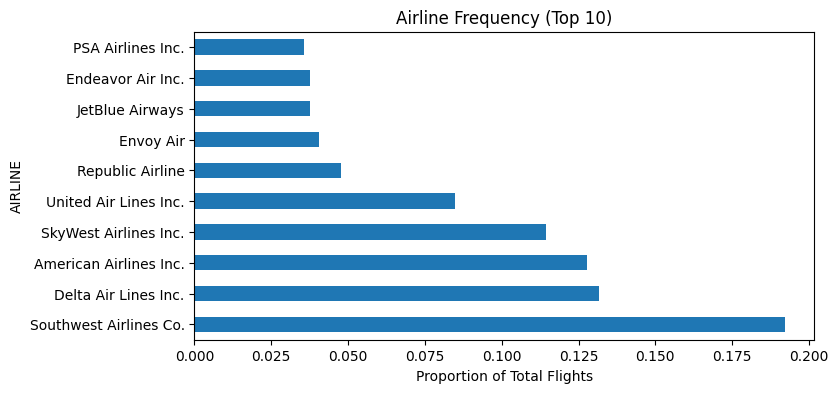

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Airline distribution
plt.figure(figsize=(8,4))
df['AIRLINE'].value_counts(normalize=True).head(10).plot(kind='barh')
plt.title("Airline Frequency (Top 10)")
plt.xlabel("Proportion of Total Flights")
plt.show()


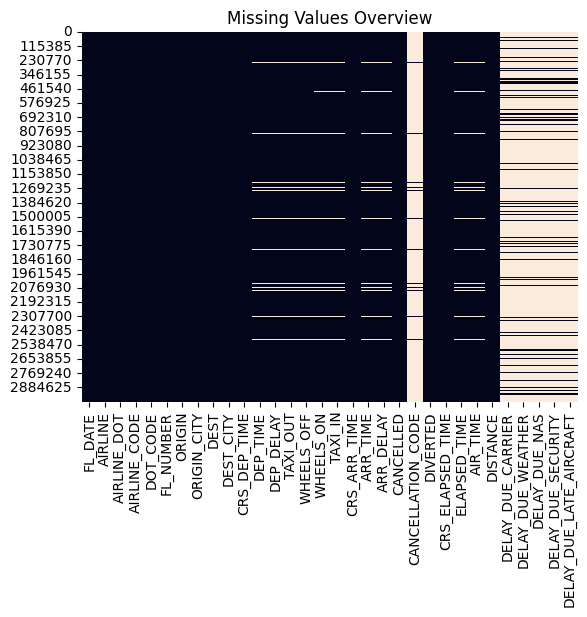

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Missing values heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Overview")
plt.show()


In [8]:
# Data Cleaning Block

# Step 1: Filter cancelled and diverted
df_clean = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()  # copy() avoids the warning

# Step 2: Drop rows with missing delay/timing values
df_clean = df_clean.dropna(subset=[
    'DEP_DELAY', 'ARR_DELAY', 'DEP_TIME', 'ARR_TIME'
])

# Step 3: Fill missing delay reason values with 0 (safely)
delay_reason_cols = [
    'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
]
df_clean.loc[:, delay_reason_cols] = df_clean[delay_reason_cols].fillna(0)



In [9]:
print(df_clean.isnull().sum().sort_values(ascending=False))


CANCELLATION_CODE          2913802
FL_DATE                          0
AIRLINE_DOT                      0
AIRLINE                          0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
AIRLINE_CODE                     0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                         0
WHEELS_OFF                       0
ORIGIN_CITY                      0
WHEELS_ON                        0
TAXI_IN                          0
ARR_TIME                         0
CRS_ARR_TIME                     0
ARR_DELAY                        0
CANCELLED                        0
DIVERTED                         0
CRS_ELAPSED_TIME                 0
ELAPSED_TIME                     0
AIR_TIME                         0
DISTANCE                         0
DELAY_DUE_CARRIER                0
DELAY_DUE_WEATHER   

### Data Cleaning Steps

In this section, we prepare the dataset for analysis by:

1. **Filtering out cancelled and diverted flights**  
   These records are not useful for delay prediction, as they didn't operate as planned.

2. **Dropping rows with missing timing or delay values**  
   We remove rows with missing values in critical columns like `DEP_DELAY`, `ARR_DELAY`, `DEP_TIME`, and `ARR_TIME` to ensure accurate analysis.

3. **Filling missing delay reason values with 0**  
   Delay reason columns such as `DELAY_DUE_CARRIER` or `DELAY_DUE_WEATHER` are often null for on-time flights. We safely fill these with `0` to indicate no delay due to that reason.

We then confirm that the dataset is clean and ready for EDA by checking for any remaining missing values.


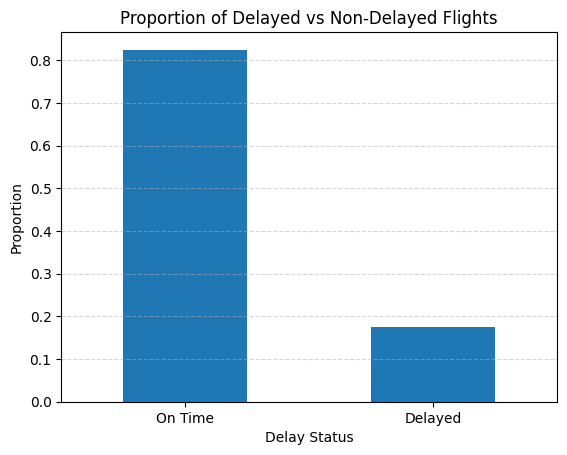

In [13]:
# Define binary target: 1 = delayed (>15 mins), 0 = not delayed
df_clean["IS_DELAYED"] = (df_clean["DEP_DELAY"] > 15).astype(int)

# Class balance plot
df_clean["IS_DELAYED"].value_counts(normalize=True).plot(kind='bar')
plt.title("Proportion of Delayed vs Non-Delayed Flights")
plt.xlabel("Delay Status")
plt.ylabel("Proportion")
plt.xticks(ticks=[0,1], labels=["On Time", "Delayed"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)


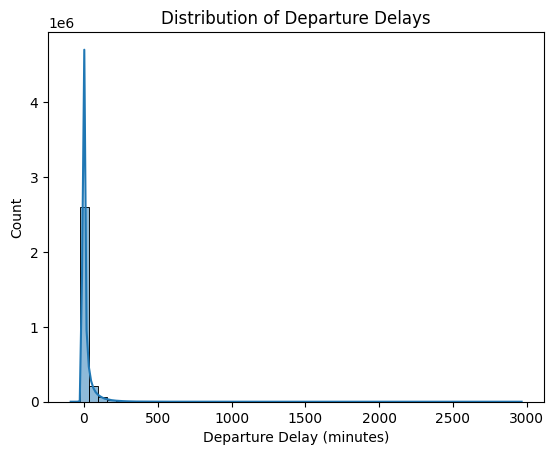

In [16]:
# Departure delay distribution
sns.histplot(df['DEP_DELAY'].dropna(), bins=50, kde=True)
plt.title("Distribution of Departure Delays")
plt.xlabel("Departure Delay (minutes)")
plt.show()



###  Distribution of Departure Delays

This plot shows the distribution of `DEP_DELAY` (departure delay in minutes).  
As expected, most flights have minimal delays, while a small number of extreme outliers exist.  
These long delays can disproportionately impact modeling and may need to be capped or treated as outliers in later preprocessing steps.


In [18]:
import pandas as pd

# Load your dataset again
df = pd.read_csv("/kaggle/input/flight-delay-and-cancellation-dataset-2019-2023/flights_sample_3m.csv")

# Step 1: Filter cancelled and diverted
df_clean = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()

# Step 2: Drop rows with missing delay/timing values
df_clean = df_clean.dropna(subset=[
    'DEP_DELAY', 'ARR_DELAY', 'DEP_TIME', 'ARR_TIME'
])

# Step 3: Fill missing delay reason values with 0
delay_reason_cols = [
    'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
]
df_clean.loc[:, delay_reason_cols] = df_clean[delay_reason_cols].fillna(0)


In [19]:
# Feature Engineering
df_clean['FL_DATE'] = pd.to_datetime(df_clean['FL_DATE'])
df_clean['DAY_OF_WEEK'] = df_clean['FL_DATE'].dt.dayofweek
df_clean['MONTH'] = df_clean['FL_DATE'].dt.month
df_clean['DEP_HOUR'] = df_clean['CRS_DEP_TIME'] // 100
df_clean['DELAYED'] = (df_clean['DEP_DELAY'] > 15).astype(int)

df_clean[['DEP_DELAY', 'DELAYED', 'DAY_OF_WEEK', 'DEP_HOUR']].head()


,DEP_DELAY,DELAYED,DAY_OF_WEEK,DEP_HOUR
0,-4.0,0,2,11
1,-6.0,0,5,21
2,6.0,0,4,9
3,-1.0,0,0,16
4,-2.0,0,6,18


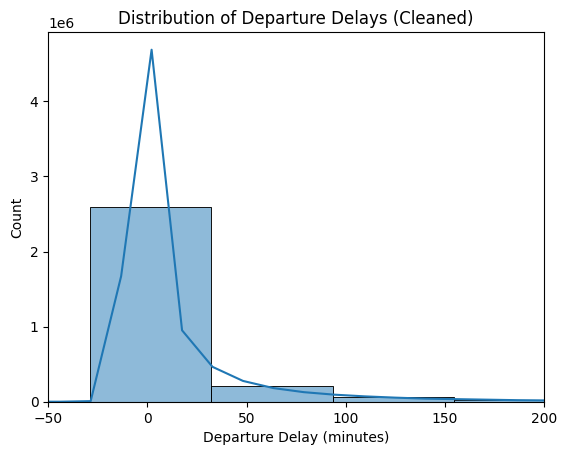

In [14]:
# Departure delay distribution
sns.histplot(df_clean['DEP_DELAY'], bins=50, kde=True)
plt.title("Distribution of Departure Delays (Cleaned)")
plt.xlabel("Departure Delay (minutes)")
plt.xlim(-50, 200)
plt.show()




###  Zoomed-In Distribution of Departure Delays

The original distribution was heavily skewed due to extreme outliers.  
This plot focuses on delays between -50 and 200 minutes to reveal real-world patterns.

- Most flights depart within ±15 minutes of schedule.
- A significant number of flights are delayed between 15–60 minutes.
- The distribution has a long right tail, indicating occasional severe delays.

This supports using a binary classification threshold of `>15 minutes` for defining delay (`IS_DELAYED = 1`).


In [20]:
# Date and time features
df_clean['FL_DATE'] = pd.to_datetime(df_clean['FL_DATE'])
df_clean['DAY_OF_WEEK'] = df_clean['FL_DATE'].dt.dayofweek
df_clean['MONTH'] = df_clean['FL_DATE'].dt.month
df_clean['DEP_HOUR'] = df_clean['CRS_DEP_TIME'] // 100

# Target: DELAYED (binary)
df_clean['DELAYED'] = (df_clean['DEP_DELAY'] > 15).astype(int)


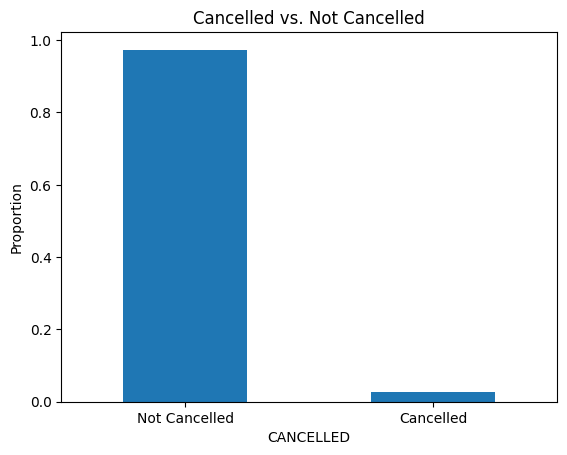

In [21]:
# Cancellations
df['CANCELLED'].value_counts(normalize=True).plot(kind='bar')
plt.title("Cancelled vs. Not Cancelled")
plt.xticks([0, 1], ["Not Cancelled", "Cancelled"], rotation=0)
plt.ylabel("Proportion")
plt.show()


###  Date & Time Feature Engineering

To better analyze flight patterns and predict delays, we extract time-related features from `FL_DATE` and `CRS_DEP_TIME`:

- `DAY_OF_WEEK`: Day of the week (0 = Monday, 6 = Sunday)
- `MONTH`: Month of the year
- `DEP_HOUR`: Scheduled departure hour (extracted from military time)

These features are useful for uncovering trends in delay behavior across different times of the year or day.

---

### Target Variable: DELAYED

We define a binary target variable `DELAYED`:
- `1` if `DEP_DELAY > 15` minutes
- `0` otherwise

This variable is used for classification modeling of flight delay likelihood.


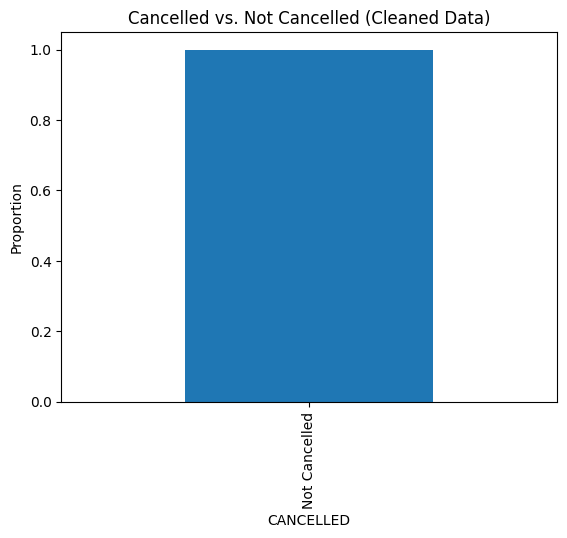

In [22]:
# Plot for cleaned data
df_clean['CANCELLED'].value_counts(normalize=True).plot(kind='bar')
plt.title("Cancelled vs. Not Cancelled (Cleaned Data)")
plt.xticks([0], ["Not Cancelled"])
plt.ylabel("Proportion")
plt.show()


### Verification: No Cancelled Flights in Cleaned Data

As a sanity check, we verify that the cleaned dataset (`df_clean`) contains only non-cancelled flights.  
This confirms that our earlier cleaning step (removing `CANCELLED == 1`) was applied correctly.

All remaining records now represent flights that actually departed, making the dataset suitable for delay analysis and prediction.


In [23]:
# Create binary target: DELAYED = 1 if departure delay > 15 mins
df_clean['DELAYED'] = (df_clean['DEP_DELAY'] > 15).astype(int)


# Average Delay Rate by Airline

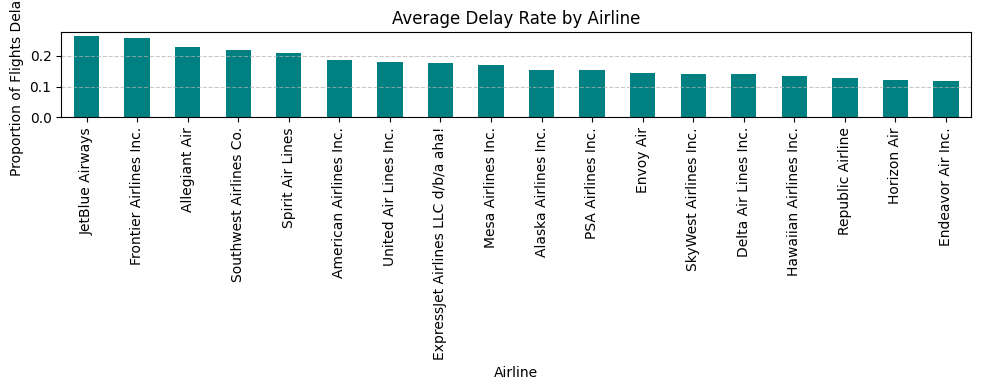

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

airline_delay = df_clean.groupby('AIRLINE')['DELAYED'].mean().sort_values(ascending=False)
airline_delay.plot(kind='bar', figsize=(10,4), color='teal')
plt.title("Average Delay Rate by Airline")
plt.ylabel("Proportion of Flights Delayed")
plt.xlabel("Airline")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Average Delay Rate by Airline

This bar chart displays the average proportion of delayed flights (`DELAYED = 1`) for each airline in the dataset.

Key observations:
- Airlines like **JetBlue Airways** and **Frontier Airlines** show the highest delay rates.
- Airlines with lower delay rates include **Endeavor Air Inc.**, **Horizon Air**, and **Republic Airline**.
- This insight can be useful for both operational benchmarking and feature engineering in predictive modeling.


# Flight Delay Rate by Day of Week (0 = Monday)

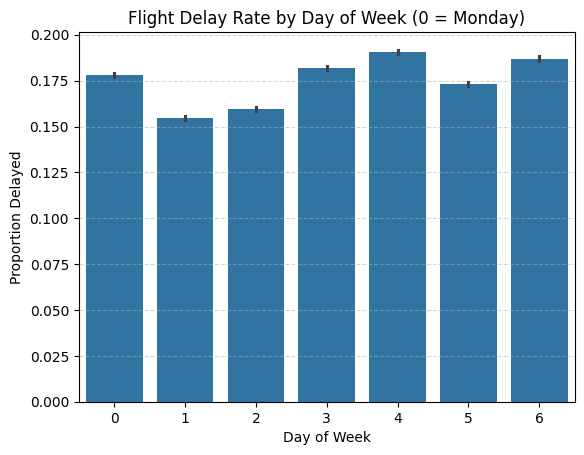

In [25]:
# Ensure FL_DATE is in datetime format
df_clean['FL_DATE'] = pd.to_datetime(df_clean['FL_DATE'])

# Extract time-based features
df_clean['DAY_OF_WEEK'] = df_clean['FL_DATE'].dt.dayofweek   # 0 = Monday
df_clean['MONTH'] = df_clean['FL_DATE'].dt.month
df_clean['DEP_HOUR'] = df_clean['CRS_DEP_TIME'] // 100

sns.barplot(data=df_clean, x='DAY_OF_WEEK', y='DELAYED')
plt.title("Flight Delay Rate by Day of Week (0 = Monday)")
plt.xlabel("Day of Week")
plt.ylabel("Proportion Delayed")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Flight Delay Rate by Day of Week (0 = Monday)

This plot shows the average proportion of delayed flights for each day of the week.

**Observations:**
- Flights tend to be more delayed toward the **middle and end of the week**, particularly on **Thursday (day 3)** and **Friday (day 4)**.
- **Tuesday (day 1)** appears to have the lowest delay rate on average.
- This insight can be used to engineer time-based features or inform operational scheduling decisions.

The day codes follow Python’s `dt.dayofweek` standard, where `0 = Monday` and `6 = Sunday`.


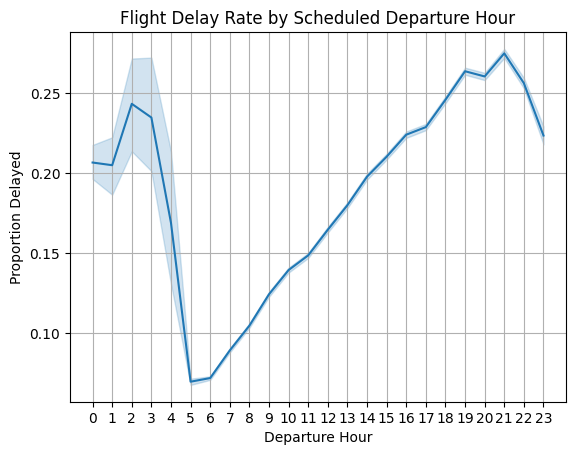

In [27]:
# Ensure departure time feature is created
df_clean['DEP_HOUR'] = df_clean['CRS_DEP_TIME'] // 100

sns.lineplot(data=df_clean, x='DEP_HOUR', y='DELAYED')
plt.title("Flight Delay Rate by Scheduled Departure Hour")
plt.xlabel("Departure Hour")
plt.ylabel("Proportion Delayed")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


###  Flight Delay Rate by Scheduled Departure Hour

This line plot visualizes how delay likelihood varies by scheduled departure hour.

**Key insights:**
- Flights departing **very early in the morning (4–6 AM)** have the **lowest delay rates**, likely due to fresh starts and minimal backlog.
- Delay probability increases steadily from **10 AM onward**, peaking between **6 PM and 9 PM**, likely due to cascading delays from earlier flights.
- This trend reinforces the concept of **operational delay propagation** over the day.

Such time-based features are strong predictors in delay classification models.


# Delay Rate by Distance Bin

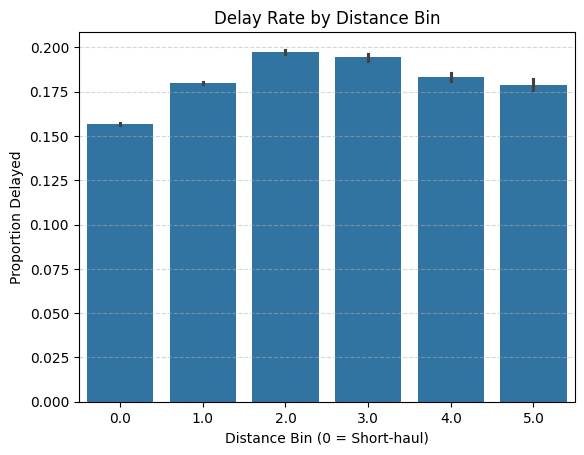

In [28]:
df_clean['DISTANCE_BIN'] = pd.cut(df_clean['DISTANCE'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000], labels=False)

sns.barplot(data=df_clean, x='DISTANCE_BIN', y='DELAYED')
plt.title("Delay Rate by Distance Bin")
plt.xlabel("Distance Bin (0 = Short-haul)")
plt.ylabel("Proportion Delayed")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


###  Delay Rate by Flight Distance Bin

This plot shows the average delay rate across different flight distance ranges (binned):

- Bin `0`: Short-haul flights (0–500 miles)
- Bin `1`: 500–1000 miles
- Bin `2`: 1000–1500 miles
- ...
- Bin `5`: Long-haul flights up to 3000 miles

**Key insights:**
- Delay rates increase for mid-range flights (1000–2000 miles), peaking in Bin 2.
- Short-haul flights are **least delayed** — likely due to more flexibility in routing and turnaround.
- Very long-haul flights (>2000 miles) show a **slight dip**, possibly due to prioritization or longer buffer times.

This engineered feature may help your model generalize across different route types.


# Feature Correlation Matrix

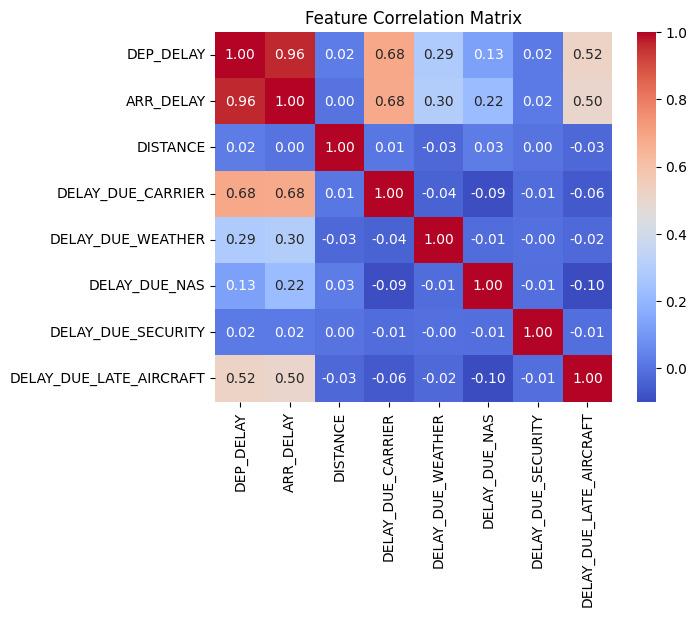

In [29]:
corr = df_clean[[
    'DEP_DELAY', 'ARR_DELAY', 'DISTANCE',
    'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
]].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


###  Feature Correlation Matrix

This heatmap visualizes the pairwise correlations between key numeric features in the dataset.

**Key insights:**
- `DEP_DELAY` and `ARR_DELAY` are **almost perfectly correlated (0.96)** — as expected, departure delays propagate to arrivals.
- `DEP_DELAY` shows strong positive correlation with `DELAY_DUE_CARRIER` (0.68) and `DELAY_DUE_LATE_AIRCRAFT` (0.52), reinforcing the role of internal airline logistics.
- `DELAY_DUE_NAS` and `DISTANCE` show weaker or negligible correlations with other variables.
- Low correlations among most delay reasons suggest **they represent distinct operational issues**.

This analysis is useful for:
- **Feature selection** (to avoid multicollinearity)
- **Interpreting model behavior**
- Engineering more orthogonal features


# Delay Rate for Top 20 Routes

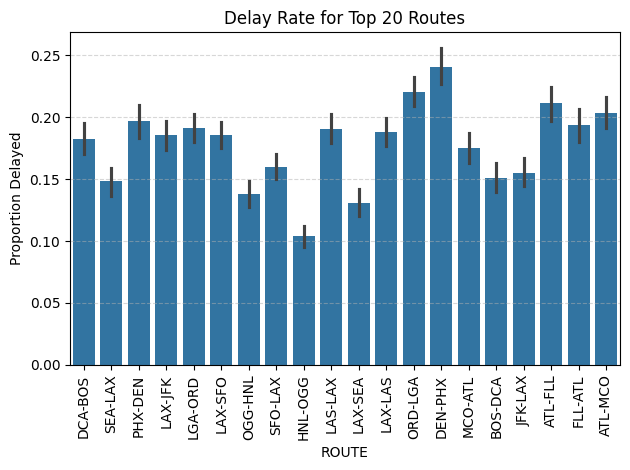

In [30]:
df_clean['ROUTE'] = df_clean['ORIGIN'] + '-' + df_clean['DEST']
top_routes = df_clean['ROUTE'].value_counts().head(20).index

sns.barplot(data=df_clean[df_clean['ROUTE'].isin(top_routes)], x='ROUTE', y='DELAYED')
plt.title("Delay Rate for Top 20 Routes")
plt.xticks(rotation=90)
plt.ylabel("Proportion Delayed")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###  Delay Rate for Top 20 Routes

This bar chart shows the average delay rate for the 20 most frequent routes in the dataset.

**Key takeaways:**
- Routes like **ORD–LGA**, **DEN–PHX**, and **LAX–SEA** have the **highest delay rates**.
- Shorter, high-traffic routes tend to experience more delays — possibly due to tighter turnaround schedules and congested airspace.
- Routes such as **HNL–OGG** and **LAX–LAS** show lower-than-average delay rates, possibly due to more predictable weather or better route control.

This analysis can inform:
- **Route-specific reliability modeling**
- Operational benchmarking
- Further


In [19]:
# Drop cancelled/diverted
df_clean = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]

# Convert FL_DATE to datetime
df_clean['FL_DATE'] = pd.to_datetime(df_clean['FL_DATE'])

# Drop rows with null delays
df_clean = df_clean.dropna(subset=['DEP_DELAY', 'ARR_DELAY'])

# Confirm shape
print(df_clean.shape)


<ipython-input-19-6ae6214b47ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['FL_DATE'] = pd.to_datetime(df_clean['FL_DATE'])


(2913802, 32)
